In [2]:
!source .env/bin/activate

from fastcore.xtras import Path
from fastai.vision.all import *
from PIL import Image

In [3]:
data_path = Path("data/")
data_path.ls()

(#7) [Path('data/metal'),Path('data/trash'),Path('data/glass'),Path('data/cardboard'),Path('data/paper'),Path('data/plastic'),Path('data/.ipynb_checkpoints')]

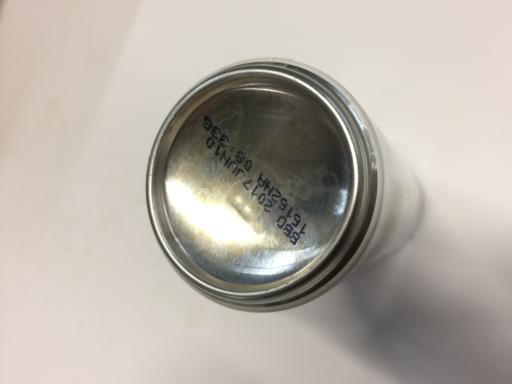

In [4]:
im_path = (data_path/'metal').ls()[0]
im = Image.open(im_path)
im

In [5]:
bad_imgs = []
classes = ['metal', 'trash', 'glass', 'cardboard', 'paper', 'plastic']
for c in classes:
    for im in (data_path/c).ls():
        try:
            _ = Image.open(im)
        except:
            bad_imgs.append(im)
            im.unlink()
bad_imgs, len(bad_imgs)

([], 0)

In [6]:
fnames = get_image_files(data_path)
fnames

(#2527) [Path('data/metal/metal145.jpg'),Path('data/metal/metal344.jpg'),Path('data/metal/metal66.jpg'),Path('data/metal/metal204.jpg'),Path('data/metal/metal293.jpg'),Path('data/metal/metal282.jpg'),Path('data/metal/metal303.jpg'),Path('data/metal/metal308.jpg'),Path('data/metal/metal57.jpg'),Path('data/metal/metal128.jpg')...]

## ImageDataLoaders

In [7]:

dls = ImageDataLoaders.from_folder(
    data_path,
    train='.',  # Diretório raiz é utilizado como treinamento
    valid_pct=0.2,  # 20% dos dados serão usados para validação
    seed=42,  # Define uma seed para garantir a mesma divisão em diferentes execuções
    item_tfms=Resize(224),  # Redimensiona as imagens para 224x224
    batch_tfms=*aug_transforms()  # Aplica transformações de data augmentation
)

SyntaxError: invalid syntax (785209389.py, line 7)